<a href="https://colab.research.google.com/github/bunquadi/Do_An_Cuoi_Ki/blob/main/PL_g%E1%BA%A1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url= '/content/drive/MyDrive/gạo/train'
test_data =  '/content/drive/MyDrive/gạo/val' 
val_data  =  '/content/drive/MyDrive/gạo/val' 

In [ ]:
generator=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=generator.flow_from_directory(url,target_size=(64,64),batch_size=10,class_mode='categorical',subset='training')
validation_data=generator.flow_from_directory(url,target_size=(64,64),batch_size=10,class_mode='categorical',subset='validation')
label=list()
for key in train_data.class_indices:

  label.append(key)
validation_data.class_indices
print(label)


Found 1013 images belonging to 15 classes.
Found 245 images belonging to 15 classes.
['1. Gao  Thai', '10. Gao nhat', '11. Gao Pakistan', '12. Gao Campuchia', '13. Gao Myanmar', '14. Gao An', '15. Nep', '2. Gao lut nau', '3. Gao nep lao', '4. Gao italia', '5. Gao Han', '6. Gao thom Jasmine', '7. Gao lut đen', '8. Gao Trung quoc', '9. Gao viet']


In [ ]:
model= Sequential()
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(64,64,3)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(15,activation='softmax'))
opt=Adam(lr=0.0002)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_data,epochs=50,batch_size=64,validation_data=validation_data,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
102/102 [==============================] - 279s 3s/step - loss: 2.6073 - accuracy: 0.1431 - val_loss: 2.3785 - val_accuracy: 0.2082
Epoch 2/50
102/102 [==============================] - 4s 42ms/step - loss: 2.1253 - accuracy: 0.2962 - val_loss: 2.1767 - val_accuracy: 0.3184
Epoch 3/50
102/102 [==============================] - 4s 42ms/step - loss: 1.4904 - accuracy: 0.5114 - val_loss: 1.9808 - val_accuracy: 0.3429
Epoch 4/50
102/102 [==============================] - 5s 44ms/step - loss: 0.9203 - accuracy: 0.7256 - val_loss: 2.0684 - val_accuracy: 0.5020
Epoch 5/50
102/102 [==============================] - 4s 43ms/step - loss: 0.5880 - accuracy: 0.8440 - val_loss: 2.1057 - val_accuracy: 0.5265
Epoch 6/50
102/102 [==============================] - 4s 41ms/step - loss: 0.4546 - accuracy: 0.8638 - val_loss: 2.2061 - val_accuracy: 0.6122
Epoch 7/50
102/102 [==============================] - 4s 41ms/step - loss: 0.4082 - accuracy: 0.8806 - val_loss: 2.4972 - val_accuracy: 0.5959

In [ ]:
model.save('PL gạo.h5')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


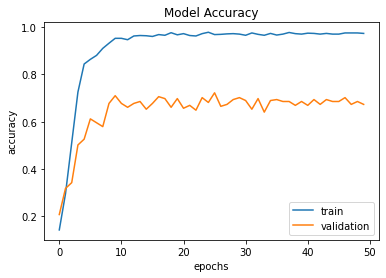

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
score=model.evaluate(validation_data,verbose=1)
print('loss: ',score[0])
print('accuracy: ',score[1])

25/25 [==============================] - 1s 43ms/step - loss: 1.8868 - accuracy: 0.6735
loss:  1.8867993354797363
accuracy:  0.6734693646430969
